## **Rent Properties**

##### **Name**  : Livia Amanda Annafiah
-------

##### **Program Description**
This program aims to find anomalies in a rent properties database and make an API.

#### **Load Data**

In [172]:
from google.colab import auth
from google.cloud import bigquery
auth.authenticate_user()
print('Authenticated')

project_id = "hacktiv8-sql-417802"
client = bigquery.Client(project=project_id)

Authenticated


In [173]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
# Access full database
full_df = client.query('''
SELECT *
FROM `bigquery-public-data.properati_properties_ar.properties_rent_201501`
LIMIT 5000
''').to_dataframe()

full_df

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat_lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,c6bd9655ab214262f35dc01991e93257ef27a80e,2014-10-14,rent,apartment,Córdoba,|Argentina|Córdoba|,Argentina,Córdoba,3860255,"-31.4130559,-64.1635496",...,<NA>,NaN,NaN,<NA>,<NA>,<NA>,http://www.properati.com.ar/j1jl_alquiler_depa...,CODIGO: ubicado en: Av. 24 de Septiembre 1500...,1 dormitorio Av. 24 de Septiembre al 1500,https://thumbs4.properati.com/4/EgZ85yu3sEnl75...
1,271e03d0640ca794bd0c96185cbe6565e5cbb532,2015-01-27,rent,apartment,Córdoba,|Argentina|Córdoba|,Argentina,Córdoba,3860255,"-32.2492552,-62.6383524",...,<NA>,NaN,NaN,<NA>,<NA>,<NA>,http://www.properati.com.ar/kl57_alquiler_depa...,CODIGO: 928-AAA2 ubicado en: CONSTITUCION 515 ...,"HERMOSO DPTO 1 DORM., 1 CUADRA PLAZA CENTRAL, ...",https://thumbs4.properati.com/5/fw7PzqiMtqJIi1...
2,3c270a1a138cdc8caec56effb996e466ddf32b7d,2014-09-12,rent,apartment,Córdoba,|Argentina|Córdoba|,Argentina,Córdoba,3860255,"-31.4058291,-64.166296",...,<NA>,NaN,NaN,<NA>,<NA>,<NA>,http://www.properati.com.ar/ihr7_alquiler_depa...,CODIGO: ubicado en: ARMENIA 1500 - Publicado...,ALQUILER- DEPARTAMENTO 1 DORM Bº PUEYRREDON,https://thumbs4.properati.com/7/3hUY0xZYvBs9a0...
3,41ef61845ba4e05528569a1890520abc28409862,2014-11-21,rent,apartment,Córdoba,|Argentina|Córdoba|,Argentina,Córdoba,3860255,"-31.3866062,-64.216713",...,28,NaN,66.071429,<NA>,<NA>,<NA>,http://www.properati.com.ar/jru5_alquiler_depa...,CODIGO: ubicado en: AV CARAFFA ESQUINA GATO Y...,VILLA CABRERA - MONOAMBIENTE - Av CARAFFA ALQ...,https://thumbs4.properati.com/9/_bLCgo7EEuQaUj...
4,565382b9fb48cebf10820a8010fa33ff1ffa195b,2014-12-02,rent,house,Córdoba,|Argentina|Córdoba|,Argentina,Córdoba,3860255,"-31.4016324,-64.1678943",...,400,NaN,18.750000,<NA>,<NA>,<NA>,http://www.properati.com.ar/jx35_alquiler_casa...,CODIGO: ubicado en: ROMA 1300 - Publicado po...,ALQUILER__Bº PUEYRREDON CASA 3 DORM.(roma 1300),https://thumbs4.properati.com/2/XpLMkJyw06Gjyd...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3291,c68a7554dcd6ae34b7ceb2cde8f931db8b575e31,2014-12-22,rent,house,Valeria del Mar,|Argentina|Buenos Aires Costa Atlántica|Valeri...,Argentina,Buenos Aires Costa Atlántica,3427561,"-37.1400261,-56.8920174",...,<NA>,3.318,NaN,<NA>,1,<NA>,http://www.properati.com.ar/k4ph_alquiler_casa...,Para mas informacion en nuestra pagina Daniel ...,Casa alquiler,https://thumbs4.properati.com/9/JyVrcVM4Iu8097...
3292,c24f751acf9332ee53b954498566beee4d572718,2015-01-27,rent,house,Valeria del Mar,|Argentina|Buenos Aires Costa Atlántica|Valeri...,Argentina,Buenos Aires Costa Atlántica,3427561,"-37.1400261,-56.8920174",...,<NA>,3.318,NaN,<NA>,1,<NA>,http://www.properati.com.ar/kl3m_alquiler_casa...,Para mas informacion en nuestro portal danielb...,Casa alquiler,https://thumbs4.properati.com/9/WTTisYwdeIJpkp...
3293,5c4fe3f1f17c5862902d7fcc52a9d599a4e1b3cc,2015-01-20,rent,apartment,Valeria del Mar,|Argentina|Buenos Aires Costa Atlántica|Valeri...,Argentina,Buenos Aires Costa Atlántica,3427561,"-37.1400261,-56.8920174",...,<NA>,3.318,NaN,<NA>,1,<NA>,http://www.properati.com.ar/kied_alquiler_depa...,Para mas informacion en nuestro portal danielb...,Departamentos alquiler,https://thumbs4.properati.com/3/EefKJnxcpQhVXx...
3294,b154bc45c2968f553e02925865771d2319f28865,2015-01-24,rent,house,Valeria del Mar,|Argentina|Buenos Aires Costa Atlántica|Valeri...,Argentina,Buenos Aires Costa Atlántica,3427561,"-37.1400261,-56.8920174",...,<NA>,3.318,NaN,<NA>,1,<NA>,http://www.properati.com.ar/kksu_alquiler_casa...,Para mas informacion en nuestro portal danielb...,Casa alquiler,https://thumbs4.properati.com/8/KQQ3I7XLJrOAGz...


It can be seen that there are a total of 3296 rows and 27 columns from the database. However, the needed column for this analysis is the price with some condition from the operation and property_type column.

In [175]:
# Selecting data
df = client.query('''
SELECT price
FROM `bigquery-public-data.properati_properties_ar.properties_rent_201501`
WHERE operation = 'rent' and property_type = 'apartment'
LIMIT 5000
''').to_dataframe()

# Show result
df

,price
0,2500.0
1,3500.0
2,2850.0
3,1850.0
4,1000.0
...,...
1767,500.0
1768,500.0
1769,500.0
1770,500.0


After selecting the needed data, the total rows are 1772 with 1 column only. The `and` operation is used to state the wanted condition.

In [176]:
# Removing rows with 0 value
df = df[df['price'] != 0]

To make sure there is no 0 values that is calculated in this analysis, the rows with 0 values is deleted.


***Note:***
If the rows are not removed, the mode would be 0 which doesn't meet the expected result.

#### **Central Tendency**

In [177]:
# Counting the central tendency
mean = df['price'].mean()
median = df['price'].median()
mode = df['price'].mode().values[0]

# Create dataframe
centralTendency = pd.DataFrame({'Statistic': ['Mean', 'Median', 'Mode'],
                                'Price': [f"{mean:.2f}", f"{median:.2f}", f"{mode:.2f}"]})

# Show result
centralTendency

,Statistic,Price
0,Mean,7108.56
1,Median,3600.00
2,Mode,2500.00


The statistics indicate central tendency of the "Price" variable:

**Mean Price**: The average price for renting an apartment is approximately $7108.56.

**Median Price**: The middle value is $3600.00, less affected by outliers.

**Mode Price**: The most frequent price is $2500.00 which means it appears most often in the dataset.

In summary, these statistics give insights into the typical, middle, and most frequent price observed in the dataset. Due to the difference between the mean and median, it indicates that there are some values that dragged the mean to the higher ends.


#### **Skewness**

In [178]:
# Counting skewness
skew = df['price'].skew()

# Create dataframe
skewness = pd.DataFrame({'Statistic': ['Skewness'],
                         'Price': [f"{skew:.2f}"]})
# Show result
skewness

,Statistic,Price
0,Skewness,3.87


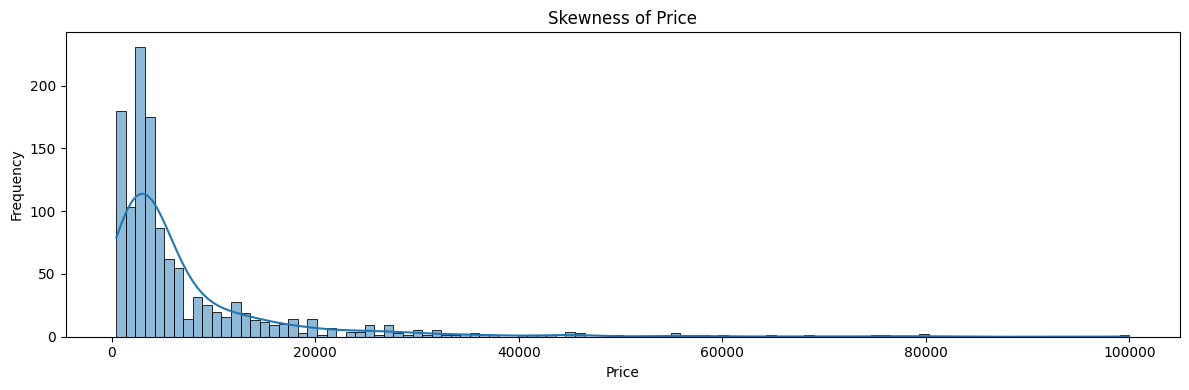

In [179]:
# Create a figure side by side
fig, axes = plt.subplots(1, 1, figsize=(12, 4))

# Plot skewness
sns.histplot(df['price'], kde=True, ax=axes)
axes.set_title('Skewness of Price')
axes.set_xlabel('Price')
axes.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

**Skewness**: With a skewness value of 3.87 (greater than 1), the distribution of the "Price" variable is **highly skewed to the right** (positive skew). This finding aligns with the plotted figure above. Skewness measures the asymmetry of data distribution, where a normal distribution would have a skewness of 0. In conclusion, the data is not distributed normally.

#### **Extreme Value Analysis**

In [180]:
# Counting kurtosis
kur = df['price'].kurtosis()

# Creating dataframe
kurtosis = pd.DataFrame({'Statistic': ['Kurtosis'],
                         'Price': [f"{kur:.2f}"]})
# Show result
kurtosis

,Statistic,Price
0,Kurtosis,20.69


**Kurtosis**: A kurtosis value of 20.69 indicates a distribution with very high kurtosis or is usually called Leptokurtic distribution. Kurtosis measures the "tailedness" of the distribution, or in simpler terms, how much data is in the tails compared to the rest of the distribution. A normal distribution has a kurtosis of 0, but this high kurtosis value indicates heavy tails and the presence of outliers. In summary, the kurtosis statistics suggest that the "Price" variable has extreme values or outliers.

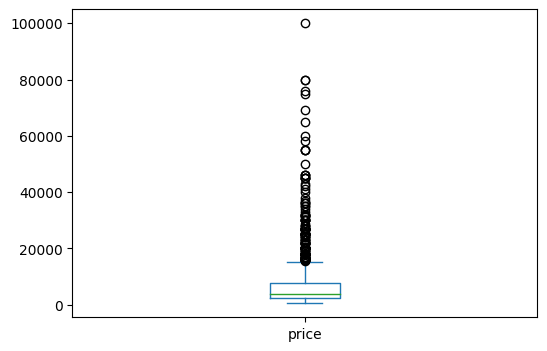

In [181]:
# Stating the size of plot
fig, ax = plt.subplots(figsize=(6, 4))

# Stating column plot
df['price'].plot(kind='box', ax=ax)

# Show figure
plt.show()

To support this, from the image above, a box plot is used to visualize data with outliers. The circles outside the box indicate the presence of outliers.

There are 2 techniques to do the extreme value analysis, which are **Z-Score** and **Tukey's rule**. Z-score is usually used for normal distribution, while Tukey's rule is usually used for a skewed distribution.

In this case, it can be concluded that the data has a skewed distribution. Therefore, for determining the lower and upper boundary, **Tukey's rule** will be used.

In [182]:
# Counting IQR
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3-q1

# Counting lower and upper boundary
up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr

# Show results
print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

Upper Boundary: 15000.00
Lower Boundary: -5000.00


In [183]:
# Create variables that contains outlier only
outlier = df['price'][(df['price']<low_bound) | (df['price']>up_bound)]

# Show the percentage of the outliers
print(f'Percentage of outliers: {len(outlier)*100/len(df["price"]):.2f}%%')

Percentage of outliers: 10.08%%


The upper boundary of **15000.00** and the lower boundary of **-5000.00** are calculated using Tukey's rule, which is commonly used to identify outliers in non-normally distributed data. Tukey's rule defines outliers as data points that fall outside of a certain range beyond the quartiles of the dataset.

The percentage of outliers is calculated to be **10.08%.** This means that approximately 10.08% of the data points in the "price" variable are considered outliers based on Tukey's rule.

Therefore, based on the non-normal distribution of the data and the use of Tukey's rule to determine outliers, it can be concluded that there are significant outliers present in the dataset, as indicated by the calculated upper and lower boundaries and the percentage of outliers.

#### **No Outlier**

In [184]:
# Creating new variables that contains no outlier
no_outlier = df['price'][(df['price']>=low_bound) & (df['price']<=up_bound)]

From the code above, the variable no outlier is created that contains new data without outliers or anomalies.

In [185]:
# Save to csv
no_outlier.to_csv("app.csv", index=False)

Finally, the data is saved to csv for further assignment.